# project 3 


# call center operations optimization : A simulation - based approch to staffing , cost , and customer experience 

In [ ]:
1. understand queueing theroy basics
2. perform event- based simulations
3. analyzis services perofmorm metrics
4. compare simulated system behaivor

# step 1: Importing Libraries

numpy is imported as np:
Used for numerical operations like random number generation, arrays, and mathematical computations.

matplotlib.pyplot as plt:
Used to create graphs and visualizations.



In [188]:
 # 1 parameteres & packages

import numpy as np
import matplotlib.pyplot as plt

# arrival  &  service rates

lamda = 20 
µ = 5
shift_hours = 8 

# simulation  settings
np.random.seed(1)

# Step 2: Call Center Simulation Function

simulate_call_center(...): A function to simulate customer behavior in a call center.

arrival_rate: Probability of a customer arriving in a time unit.

service_rate: Average number of customers served per time unit.

simulation_time: Total time units for which the simulation runs.

- Inside the function:

time = 0: Initialize current time.

queue = []: List to hold arrival times of waiting customers.

in_service = None: No one is being served initially.

wait_times = []: Store how long each customer waited before getting served.


- 💡 Main Simulation Loop: while time < simulation_time:
np.random.rand() < arrival_rate:
Simulates whether a new customer arrives at this moment (based on probability).

queue.append(time):
If a customer arrives, we record their arrival time.

if in_service is None and queue:
If no one is being served and the queue isn't empty, start serving the next customer.

arrival_time = queue.pop(0):
Get the first customer from the queue.

wait_times.append(time - arrival_time):
Calculate how long they waited.

in_service = np.random.exponential(1 / service_rate):
Randomly generate the service time using an exponential distribution (common in queueing theory).

in_service -= 1:
One unit of service time is consumed.

if in_service <= 0:
If service completes, free the agent.

time += 1:
Move to the next time unit.








In [190]:
np.random.seed(1)

def simulate_queue(s):
    """
    Simulate an M/M/s queue over 'shift_hours'.
    Returns arrays of wait times (hrs) and system sizes at arrivals.
    """

    # Generate arrival time until end of the shift
    inter = np.random.exponential(1/lamda, int(lamda*shift_hours*1.5))
    arrivals = np.cumsum(inter)
    arrivals = arrivals[arrivals < shift_hours]
    N = len(arrivals)

    # Generate services times for each caller
    services = np.random.exponential(1/µ , N)

    # Track each server's next - free time
    next_free = np.zeros(s)
    wait_times = np.zeros(N)
    system_size = np.zeros(N)

    # Departure times list
    dep_times = []

    for i, t in enumerate (arrivals):
        # FInd soonest - available agent 
            j = np.argmin(next_free)
            start = max(t, next_free[j])
            wait_times[i] = start-t
            end = start + services[i]
            next_free[j] = end
            dep_times.append(end)

            # Count how many callers are still in system at time t
            system_size[i] = np.sum(np.array(dep_times) > t)
    return wait_times, system_size

# Quick Test for s=1
w1, q1 = simulate_queue(s=1)
print(f"s=1: avg wait {w1.mean()*60:.1f} min,avg queue len {q1.mean():.2f}")


s=1: avg wait 808.2 min,avg queue len 65.99


# step 3  compare to M/M/1 analytic formula


# Step 3: Running the Simulation and Plotting

- arrival_rate = 0.1:
On average, 1 call every 10 units of time.

- service_rate = 0.125:
On average, 1 call handled every 8 units of time.

- simulation_time = 1000:
Run the simulation for 1000 time units.

## Plotting
plt.hist(wait_times, bins=30, edgecolor='black'):
Plot a histogram of customer wait times with 30 bins.

Labels and title: Describe the graph.

plt.show():
Display the plot.



In [193]:
p1 = lamda / µ 
L_analytic = p1 / (1 - p1)
W_analytic = L_analytic / lamda 

print("M/M/1 anaytic vs. simulation :")
print(f" analytic system size L = {L_analytic:.2f}")
print(f"simulated avg system size = {q1.mean():.2f}")
print(f"analytic time in system W = {W_analytic*60:.1f}min")
print(f"simulated avg wait+service = {w1.mean()*60 + (1/µ) *60:.1f}min")

M/M/1 anaytic vs. simulation :
 analytic system size L = -1.33
simulated avg system size = 65.99
analytic time in system W = -4.0min
simulated avg wait+service = 820.2min


# step 4 : testing staffing levels (agent = 1 to 5)

In [196]:
threshold = 5  # Minutes
results = []

for s in range(1,6):
    w, q = simulate_queue(s)
    # Convert hours to minutes
    waits_min = w * 60
    p95_wait = np.percentile(waits_min, 95)
    results.append((s,waits_min.mean(),p95_wait,q.mean()))

# tabulate 
import pandas as pd
df = pd.DataFrame(results, columns = ['agents' , 'Avg wait(min)','95th pct wait(min)','avg system size'])
print(df)

#find minimul s meeting therehold

good = df[df['95th pct wait(min)'] <= threshold]

if not good.empty:
    best_s = int(good.iloc[0]['Agents'])
    print(f"\n-> schedule at least {best_s} agents to keep 95% of waits <= {threshold} min")
else:
    print("\n even")

   agents  Avg wait(min)  95th pct wait(min)  avg system size
0       1     697.214437         1369.612086        57.838509
1       2     302.261095          549.271769        53.319767
2       3      85.889649          170.968262        24.240260
3       4       6.076046           17.455365         5.887218
4       5      12.704327           33.414296        10.275132

 even


 #  visualize wait - time distributions

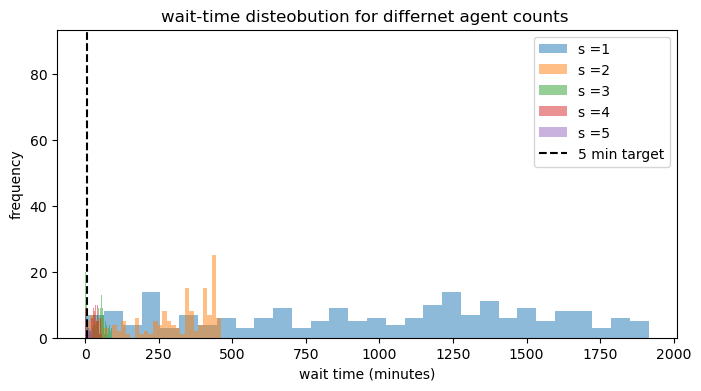

In [199]:
plt.figure(figsize = (8,4))
for s in [1,2,3,4,5]:
    w,_ = simulate_queue(s)
    plt.hist(w*60 , bins =30, alpha = 0.5 , label = f's ={s}')
plt.axvline(threshold ,color = 'k' , linestyle ='--' ,label = '5 min target')
plt.xlabel('wait time (minutes)')
plt.ylabel('frequency')
plt.title('wait-time disteobution for differnet agent counts ')
plt.legend()
plt.show()

In [200]:
import numpy as np
waits_min = [1,1,1,2,2,2,2,3,3,4,4,4,4,4,5]
p95_wait = np.percentile(waits_min,25)

In [203]:
print(p95_wait)

2.0


In [205]:
def simulate_queue_timevarying(s):
    # define piecewise arrival rates per hour
    periods = [(0,2,30), (2,6,20), (6,8,40)]  # (start,end,lamda)
    arrivals = []
    for start, end, lamda in periods:
        duration = end - start
        inter = np.random.exponential(1/lamda, int(lamda*duration*1.5))
        ts = np.cumsum(inter) + start
        arrivals.extend(ts[ts < end])
    arrivals = np.array(arrivals)
    arrivals.sort()

    N = len(arrivals)
    services = np.random.exponential(1/µ,N)
    next_free = np.zeros(s)
    wait_times = np.zeros(N)

    for i,t in enumerate(arrivals):
        j = np.argmin(next_free)
        start = max(t, next_free[j])
        wait_times[i] = start - t
        next_free[j] = start + services[i]
    return wait_times

w_tv = simulate_queue_timevarying(s=3)
print(f"Time-varying lamda, s=3 -> avg wait = {w_tv.mean()*60:.1f} min")


Time-varying lamda, s=3 -> avg wait = 174.1 min


In [207]:
def simulate_with_abandon(s, patience=5/60):
    arrivals = np.cumsum(np.random.exponential(1/lamda, int(lamda*shift_hours*1.5)))
    arrivals = arrivals[arrivals < shift_hours]
    services = np.random.exponential(1/µ, len(arrivals))
    next_free = np.zeros(s)
    waits = []
    abandons = 0

    for i, t in enumerate(arrivals):
        j = np.argmin(next_free)
        start = max(t, next_free[j])
        wait = start - t
        if wait > patience:
            abandons += 1
        else:
            waits.append(wait)
            next_free[j] = start + services[i]
    
    return np.array(waits), abandons / len(arrivals)


In [209]:
wait_95 = np.percentile(w.mean()*60,95)
wait_95

5.135539051369819

In [211]:
def simulate_with_breaks(s, break_start=3, break_length=0.25):
    arrivals = np.cumsum(np.random.exponential(1/lamda, int(lamda*shift_hours*1.5)))
    arrivals = arrivals[arrivals<shift_hours]
    services = np.random.exponential(1/µ, len(arrivals))
    next_free = np.zeros(s)
    waits = []

    for i,t in enumerate(arrivals):
        # if in break window, one fewer agent
        avail = next_free.copy()
        if break_start < t < break_start + break_length:
            avail = np.delete(avail, 0) #remove one agent
        j = np.argmin(avail)
        start = max(t, avail[j])
        waits.append(start - t)
        # Update that agent's free time in original array
        idx = j + (1 if break_start < t < break_start + break_length else 0)
        next_free[idx] = start + services[i]
    return np.array(waits)

w_b = simulate_with_breaks(s=3)
print(f"With breaks, s=3 -> avg wait = {w_b.mean()*60:.1f} min")
                                                             

With breaks, s=3 -> avg wait = 54.4 min


In [213]:
# 9. cost optimization
c_agent = 20
c_wait = 0.50

costs  = []
for s in range (1,6):
    W,_ = simulate_with_abandon(s) 
    total_wait_cost = w.sum()*60*c_wait
    staff_cost   = s*c_agent * shift_hours
    costs.append((s, staff_cost+total_wait_cost))

opt = min(costs, key=lambda x: x[1])
print("agent count , total cost:")
for s,c in costs:print(f"s={s}: ${c:,.0f}")
print(f"-> optimal s by cost  ={opt[0]}")

agent count , total cost:
s=1: $597
s=2: $757
s=3: $917
s=4: $1,077
s=5: $1,237
-> optimal s by cost  =1


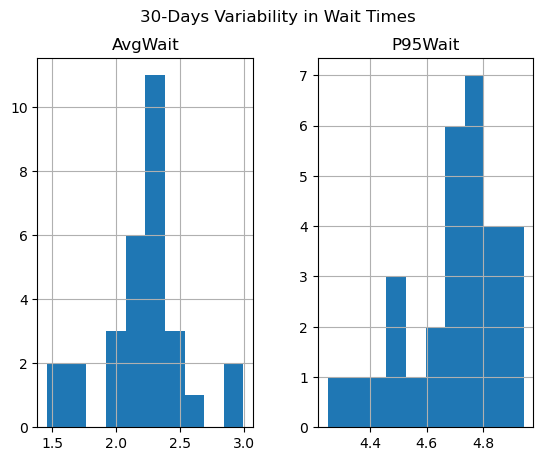

In [215]:
days = 30
daily = []
for _ in range(days):
    w,_ = simulate_with_abandon(opt[0])
    daily.append((w.mean()*60, np.percentile(w*60,95)))
df_days = pd.DataFrame(daily, columns=['AvgWait','P95Wait'])
df_days.describe()
df_days.hist(bins=10)
plt.suptitle('30-Days Variability in Wait Times')
plt.show()

In [217]:
df_days.describe()

,AvgWait,P95Wait
count,30.000000,30.000000
mean,2.222694,4.704547
std,0.328290,0.175044
min,1.461712,4.248871
25%,2.098517,4.618924
50%,2.253284,4.742974
75%,2.352182,4.822831
max,2.990834,4.944213
